In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import copy
import os
from glob import glob
import seaborn as sns #plotting for graph
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [6]:
employee_data= pd.read_csv("employee_data.csv")
insurance_data= pd.read_csv("insurance_data.csv")
vendor_data= pd.read_csv("vendor_data.csv")
employee_data.columns
insurance_data.columns


Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1',
       'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID'],
      dtype='object')

# TASK1: create a mearged csv file 

In [7]:
#use glob to merge data correctly
data_file = glob('*_data.csv') #get data from files 

data_file #check if data are corectly get or not 
#use for loop to get each file properly and sequincely 
for file in data_file:
    df= pd.read_csv(file)

df.to_csv("merged_data.csv")# save a merged file in csv format 

df=pd.read_csv("merged_data.csv")# use that file for menupulation and changing the data

df.head(10)
df.columns


Index(['Unnamed: 0', 'TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID',
       'POLICY_NUMBER', 'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT',
       'INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME',
       'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID'],
      dtype='object')

# TASK2: Top3 insurance types 

In [8]:
#INSURANCE_TYPE is a Categorival variable 
df['INSURANCE_TYPE'].value_counts().head(3)
 #/len(merg['INSURANCE_TYPE'])).plot.bar()

Property    1692
Mobile      1692
Health      1690
Name: INSURANCE_TYPE, dtype: int64

# TASK3 : Top 5 States where we are getting most insurance claims

In [58]:
df['STATE'].value_counts().head(5)#.plot.bar().

CA    1035
CO     677
FL     650
AR     644
TN     641
Name: STATE, dtype: int64

<AxesSubplot:xlabel='INSURANCE_TYPE'>

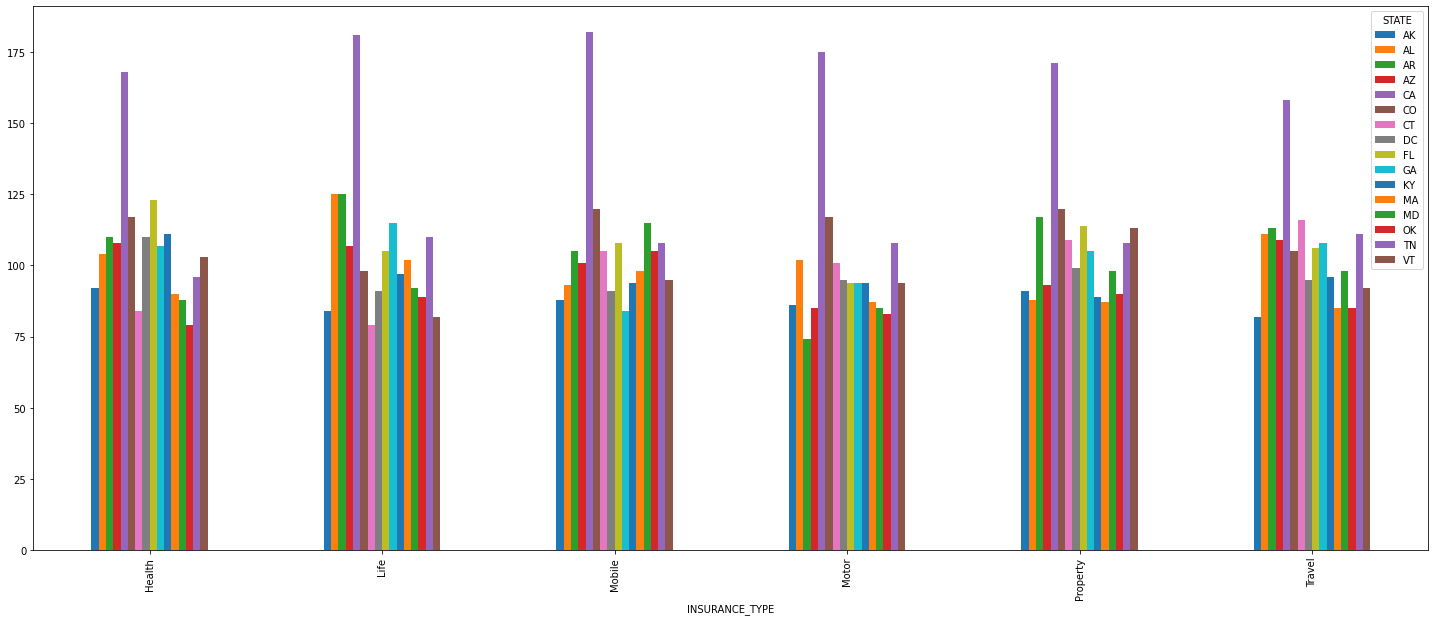

In [59]:
pd.crosstab(df['INSURANCE_TYPE'],df['STATE']).plot.bar(figsize = (25,10))

In [60]:
print(df[['ANY_INJURY','INCIDENT_STATE','ADDRESS_LINE1' ]].head(5))
#for index,row in merg.iterrows():
 #   print(index,row['INCIDENT_SEVERITY'])

   ANY_INJURY INCIDENT_STATE              ADDRESS_LINE1
0           0             GA  7701 West Saint John Road
1           1             AL       8595 West 81st Drive
2           0             CO        637 Britannia Drive
3           0             GA           2803 River Drive
4           0             TN        7573 National Drive


# TASK5: Update “AUTHORITY_CONTACTED” to Police.

In [61]:
print(df[['AUTHORITY_CONTACTED','POLICE_REPORT_AVAILABLE' ]].head(10))
#df[df['AUTHORITY_CONTACTED'].str.contains("Ambulance")]

  AUTHORITY_CONTACTED  POLICE_REPORT_AVAILABLE
0              Police                        1
1           Ambulance                        0
2              Police                        1
3           Ambulance                        0
4              Police                        1
5           Ambulance                        1
6              Police                        1
7              Police                        1
8              Police                        1
9                None                        0


In [62]:
#this statement check every 1 in "police_report_available"and make changes in Authority contacted to "police".
df.loc[ df['POLICE_REPORT_AVAILABLE'] == 1,'AUTHORITY_CONTACTED']='Police' 

In [63]:
# thi stament do vise varsa of the previous statement 
#it cahnges which ever is 0 with respect to authority connect to ambulance 
df.loc[ df['POLICE_REPORT_AVAILABLE'] == 0,'AUTHORITY_CONTACTED']='Ambulance'
print(df[['AUTHORITY_CONTACTED','POLICE_REPORT_AVAILABLE' ]].head(10))

  AUTHORITY_CONTACTED  POLICE_REPORT_AVAILABLE
0              Police                        1
1           Ambulance                        0
2              Police                        1
3           Ambulance                        0
4              Police                        1
5              Police                        1
6              Police                        1
7              Police                        1
8              Police                        1
9           Ambulance                        0


In [64]:
dev_df=df[['PREMIUM_AMOUNT','REPORT_DT']].sort_values('REPORT_DT',ascending=False)#for getting last 30 days values 
dev_df=dev_df.head(1400)
dev_df.reset_index(drop=True,inplace=True)#clean looking index 
dev_df.head(10)

,PREMIUM_AMOUNT,REPORT_DT
0,6.41,2021-06-29
1,147.42,2021-06-28
2,6.89,2021-06-28
3,68.20,2021-06-28
4,127.68,2021-06-28
5,54.14,2021-06-27
6,9.22,2021-06-27
7,127.89,2021-06-27
8,8.08,2021-06-27
9,97.18,2021-06-27


In [87]:
#Steps to calculate variance to find SD(Standard Deviation)

# 1. Calculate Mean
# 2. Calculate the distance from mean for each element
# 3. Calculate Squared distance
# 4. Take average of Squared distance

mean= dev_df['PREMIUM_AMOUNT'].mean()
difference= dev_df['PREMIUM_AMOUNT']-mean
squared_difference = difference ** 2
variance = squared_difference.mean()
print(variance)# variance with last 30 days values 
print(difference)
# or you can do this by 
#Calculating variance 
var_data = df['PREMIUM_AMOUNT'].var(ddof = 0) #normal Datafream with all values including today
var_data

2366.105264320614
0      -82.040329
1       58.969671
2      -81.560329
3      -20.250329
4       39.229671
          ...    
1395    -0.630329
1396     4.469671
1397   -81.220329
1398    21.199671
1399   -31.500329
Name: PREMIUM_AMOUNT, Length: 1400, dtype: float64


2334.1902558159773

In [66]:
standard_deviation = variance ** (1/2)
print(standard_deviation)#last 30 days
#SD of all values  
std = df['PREMIUM_AMOUNT'].std(ddof = 0)
std

48.642628057297784


48.313458330117264

# TASK7:All Agents, 2 types of Insurance Claims, Amount Approved under them in descending order

In [98]:
demo=df.loc[(df['AGENT_ID'] == 'AGENT00413') & (df['INSURANCE_TYPE']=='Health') &(df['PREMIUM_AMOUNT']>100)]
demo.reset_index(drop=True,inplace=True)
demo

,Unnamed: 0,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,...,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,ELIGIBLE_FOR_DISCOUNT
0,0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,...,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556,0
1,4593,2020-12-02 00:00:00,TXN00004594,A00009638,PLC00001802,2016-02-17,2020-11-28,2020-11-29,Health,112.11,...,Minor Loss,Police,0,1,GA,Savannah,21,AGENT00413,NaN,0
2,6015,2021-01-26 00:00:00,TXN00006016,A00008360,PLC00001364,2018-04-26,2021-01-22,2021-01-23,Health,112.52,...,Total Loss,Ambulance,0,0,CA,Hesperia,22,AGENT00413,NaN,0


In [99]:
df_sorted= df.sort_values(['AGENT_ID','INSURANCE_TYPE'])
df_sorted.head(10)
df_sorted.sort_values(by=['PREMIUM_AMOUNT'],ascending=True).head(10)

,Unnamed: 0,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,...,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,ELIGIBLE_FOR_DISCOUNT
1324,1324,2020-07-23 00:00:00,TXN00001325,A00007495,PLC00003516,2015-07-01,2020-07-19,2020-07-20,Mobile,6.00,...,Major Loss,Police,1,1,OK,Oklahoma City,12,AGENT00717,NaN,0
5626,5626,2021-01-11 00:00:00,TXN00005627,A00009960,PLC00007898,2013-11-29,2020-12-24,2020-12-29,Mobile,6.01,...,Major Loss,Ambulance,1,0,MD,West River,7,AGENT00865,VNDR00039,0
6007,6007,2021-01-26 00:00:00,TXN00006008,A00002718,PLC00009546,2016-01-19,2021-01-12,2021-01-17,Mobile,6.01,...,Total Loss,Ambulance,0,0,MD,Edgewater,17,AGENT00081,VNDR00451,0
2013,2013,2020-08-20 00:00:00,TXN00002014,A00005818,PLC00001713,2015-06-21,2020-08-10,2020-08-13,Mobile,6.01,...,Minor Loss,Ambulance,1,0,FL,Port Charlotte,13,AGENT00034,NaN,0
6402,6402,2021-02-09 00:00:00,TXN00006403,A00000304,PLC00003354,2016-04-10,2021-02-01,2021-02-04,Mobile,6.03,...,Minor Loss,Police,1,1,KY,Louisville,2,AGENT00119,NaN,0
9169,9169,2021-05-30 00:00:00,TXN00009170,A00009542,PLC00004498,2018-10-20,2021-05-13,2021-05-18,Mobile,6.05,...,Major Loss,Ambulance,0,0,AK,Anchorage,0,AGENT00261,VNDR00205,0
1131,1131,2020-07-15 00:00:00,TXN00001132,A00007560,PLC00007289,2013-10-22,2020-06-29,2020-07-04,Mobile,6.05,...,Minor Loss,Ambulance,0,0,AL,Montgomery,5,AGENT00329,NaN,0
5400,5400,2021-01-03 00:00:00,TXN00005401,A00007767,PLC00008491,2019-12-17,2020-12-22,2020-12-27,Mobile,6.05,...,Total Loss,Police,0,1,CO,Arvada,13,AGENT00014,VNDR00066,0
7853,7853,2021-04-08 00:00:00,TXN00007854,A00009252,PLC00008730,2016-05-19,2021-04-07,2021-04-07,Mobile,6.06,...,Total Loss,Police,1,1,CA,Elk Grove,9,AGENT00186,NaN,0
4672,4672,2020-12-06 00:00:00,TXN00004673,A00007514,PLC00003409,2019-08-24,2020-11-18,2020-11-23,Mobile,6.07,...,Total Loss,Police,1,1,AL,Montgomery,13,AGENT00661,VNDR00512,0


In [101]:
print(df_sorted[['AGENT_ID','INSURANCE_TYPE','PREMIUM_AMOUNT' ]].head(10))
df_sorted.reset_index(drop=True,inplace=True)
df_sorted

     AGENT_ID INSURANCE_TYPE  PREMIUM_AMOUNT
0  AGENT00001         Mobile            9.42
1  AGENT00001         Mobile           10.34
2  AGENT00001         Mobile            6.36
3  AGENT00001          Motor           82.00
4  AGENT00001          Motor           93.99
5  AGENT00001          Motor           97.31
6  AGENT00001          Motor           77.69
7  AGENT00001       Property          135.12
8  AGENT00001       Property          115.33
9  AGENT00001         Travel           50.87


,Unnamed: 0,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,...,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,ELIGIBLE_FOR_DISCOUNT
0,5563,2021-01-08 00:00:00,TXN00005564,A00002484,PLC00004324,2013-02-17,2020-12-27,2021-01-01,Mobile,9.42,...,Minor Loss,Police,1,1,OK,Oklahoma City,18,AGENT00001,NaN,1
1,7163,2021-03-10 00:00:00,TXN00007164,A00004441,PLC00006676,2014-05-09,2021-03-06,2021-03-07,Mobile,10.34,...,Major Loss,Police,1,1,FL,Panama City,7,AGENT00001,VNDR00277,0
2,7963,2021-04-12 00:00:00,TXN00007964,A00000215,PLC00004705,2017-10-11,2021-04-07,2021-04-08,Mobile,6.36,...,Total Loss,Police,0,1,TN,Nashville,5,AGENT00001,NaN,0
3,87,2020-06-03 00:00:00,TXN00000088,A00009910,PLC00005185,2011-01-31,2020-05-21,2020-05-26,Motor,82.00,...,Minor Loss,Police,0,1,FL,Lynn Haven,4,AGENT00001,VNDR00394,0
4,1460,2020-07-28 00:00:00,TXN00001461,A00007301,PLC00007129,2019-09-26,2020-07-08,2020-07-13,Motor,93.99,...,Total Loss,Police,0,1,MD,Glen Burnie,5,AGENT00001,VNDR00222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9375,2021-06-06 00:00:00,TXN00009376,A00009350,PLC00004682,2012-10-20,2021-05-23,2021-05-28,Mobile,6.47,...,Total Loss,Police,1,1,OK,Midwest City,18,AGENT01200,NaN,0
9996,1704,2020-08-07 00:00:00,TXN00001705,A00001976,PLC00004740,2012-12-27,2020-08-06,2020-08-06,Motor,77.50,...,Major Loss,Ambulance,0,0,CA,Los Angeles,2,AGENT01200,VNDR00266,0
9997,6604,2021-02-16 00:00:00,TXN00006605,A00000203,PLC00005028,2010-06-19,2021-02-15,2021-02-15,Property,145.51,...,Major Loss,Police,1,1,AL,Montgomery,9,AGENT01200,VNDR00240,0
9998,2091,2020-08-24 00:00:00,TXN00002092,A00007901,PLC00009395,2019-12-18,2020-08-23,2020-08-23,Travel,70.59,...,Total Loss,Police,1,1,CO,Arvada,2,AGENT01200,NaN,0


In [95]:
df[['INSURANCE_TYPE','PREMIUM_AMOUNT']].head(5)


,INSURANCE_TYPE,PREMIUM_AMOUNT
0,Health,157.13
1,Property,141.71
2,Property,157.24
3,Health,172.87
4,Travel,88.53


# TASK9:give discount to customer 

In [78]:

df[['TENURE','EMPLOYMENT_STATUS','NO_OF_FAMILY_MEMBERS']].tail(10)


,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS
9990,52,Y,6
9991,50,Y,3
9992,46,Y,7
9993,41,Y,5
9994,65,Y,2
9995,98,Y,3
9996,92,Y,3
9997,32,Y,2
9998,44,Y,7
9999,106,Y,2


In [85]:
#df.loc[ (df['TENURE'] > 60,df['EMPLOYMENT_STATUS']=='N',df['NO_OF_FAMILY_MEMBERS']>=4)'discount_for']=1
conditions = [ (df['TENURE'] >60) &  (df['NO_OF_FAMILY_MEMBERS'] >= 4)&(df['EMPLOYMENT_STATUS'] == 'N')  ]
choices = ['1']
df['ELIGIBLE_FOR_DISCOUNT'] = np.select(conditions, choices, default='0')

df[['TENURE','EMPLOYMENT_STATUS','NO_OF_FAMILY_MEMBERS','ELIGIBLE_FOR_DISCOUNT']].tail(10)

,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,ELIGIBLE_FOR_DISCOUNT
9990,52,Y,6,0
9991,50,Y,3,0
9992,46,Y,7,0
9993,41,Y,5,0
9994,65,Y,2,0
9995,98,Y,3,0
9996,92,Y,3,0
9997,32,Y,2,0
9998,44,Y,7,0
9999,106,Y,2,0
